In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import os
import sys


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df_original = pd.read_csv('../csv/all_matches.csv')

df_original.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51070 entries, 0 to 51069
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        51070 non-null  object
 1   home_team   51070 non-null  object
 2   away_team   51070 non-null  object
 3   home_score  51070 non-null  int64 
 4   away_score  51070 non-null  int64 
 5   tournament  51070 non-null  object
 6   country     51070 non-null  object
 7   neutral     51070 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 2.8+ MB


In [5]:
ruta_src = os.path.abspath('../src')
if ruta_src not in sys.path:
    sys.path.append(ruta_src)
from procesamiento import limpiar_y_guardar
archivo_entrada = '../csv/all_matches.csv'
archivo_salida = '../csv/limpia.csv' 


limpiar_y_guardar(archivo_entrada, archivo_salida)
df_limpia = pd.read_csv(archivo_salida)
df_limpia.head()

¡Limpieza completada! Datos guardados en: ../csv/limpia.csv
Filas resultantes: 256


,date,home_team,away_team,home_score,away_score,tournament,country
0,2010-06-11,South Africa,Mexico,1,1,World Cup,South Africa
1,2010-06-11,France,Uruguay,0,0,World Cup,South Africa
2,2010-06-12,South Korea,Greece,2,0,World Cup,South Africa
3,2010-06-12,Argentina,Nigeria,1,0,World Cup,South Africa
4,2010-06-12,England,United States,1,1,World Cup,South Africa


In [6]:
df_limpia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        256 non-null    object
 1   home_team   256 non-null    object
 2   away_team   256 non-null    object
 3   home_score  256 non-null    int64 
 4   away_score  256 non-null    int64 
 5   tournament  256 non-null    object
 6   country     256 non-null    object
dtypes: int64(2), object(5)
memory usage: 14.1+ KB


Tabla de datos generada para Colombia:


,date,home_team,away_team,goles_favor,resultado
70,2014-06-14,Colombia,Greece,3,Ganado
85,2014-06-19,Colombia,Ivory Coast,2,Ganado
100,2014-06-24,Colombia,Japan,4,Ganado
112,2014-06-28,Colombia,Uruguay,2,Ganado
120,2014-07-04,Brazil,Colombia,1,Perdido
142,2018-06-19,Japan,Colombia,1,Perdido
159,2018-06-24,Colombia,Poland,3,Ganado
174,2018-06-28,Colombia,Senegal,1,Ganado
182,2018-07-03,Colombia,England,1,Empatado


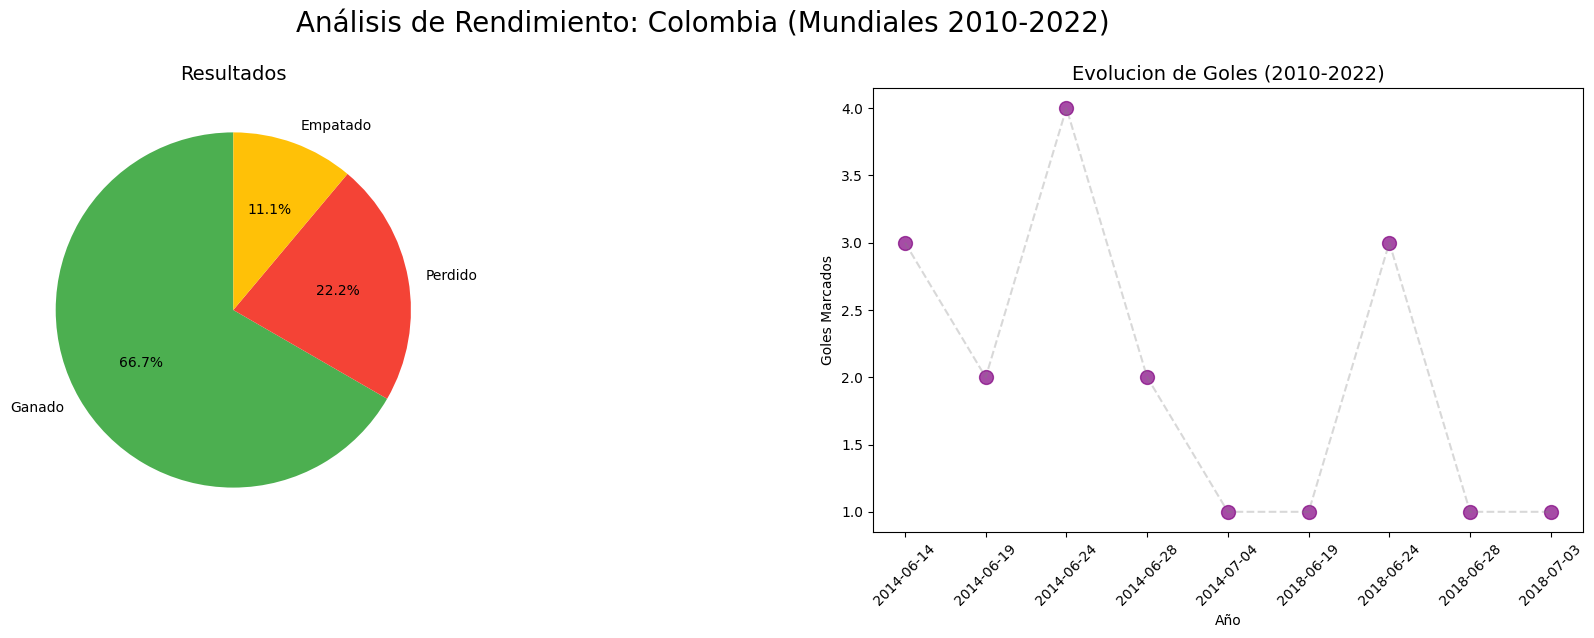

In [7]:
ruta_src = os.path.abspath('../src')
if ruta_src not in sys.path:
    sys.path.append(ruta_src)
from graficas import preparar_datos_colombia, graficar_rendimiento

df_colombia = preparar_datos_colombia(df_limpia)
print("Tabla de datos generada para Colombia:")
display(df_colombia[['date', 'home_team', 'away_team', 'goles_favor', 'resultado']])

graficar_rendimiento(df_colombia)